In [21]:
from sympy import *
from sympy.abc import *
init_printing(use_latex=True,use_unicode=True)

x1 = a*cos(w*t)+b*sin(w*t)
x2 = c*cos(w*t)+d*sin(w*t)

In [22]:
x1

In [23]:
x2

In [24]:
m1,m2,k1,k2,c2= symbols('m1 m2 k1 k2 c2',positive=True)
p0 = symbols('p0')

e1 = m1*diff(x1,t,t) + k1*x1 + k2*(x1-x2) + c2*diff(x1-x2,t) - p0*cos(w*t)
e2 = m2*diff(x2,t,t) + k2*(x2-x1) + c2*diff(x2-x1,t)

In [25]:
e1

In [26]:
e2

In [27]:
dropc = {cos(w*t):0,sin(t*w):1}
drops = {cos(w*t):1,sin(t*w):0}

zero1 = expand(e1.subs(dropc))
zero2 = expand(e1.subs(drops))
zero3 = expand(e2.subs(dropc))
zero4 = expand(e2.subs(drops))

In [28]:
zero1

In [29]:
zero2

In [30]:
zero3

In [31]:
zero4

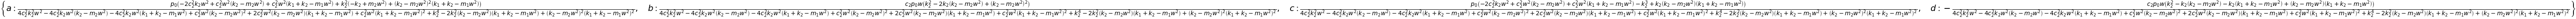

In [32]:
abcd_soln = solve([zero1,zero2,zero3,zero4],a,b,c,d)
abcd_soln

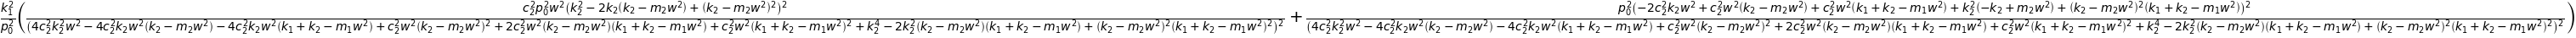

In [33]:
trsq = (a**2+b**2)/((p0/k1)**2)
trsq = trsq.subs(abcd_soln)
trsq

In [34]:
w1,w2,dr,alpha,beta = symbols('w1 w2 dr alpha beta')
dimensionless = { k1:m1*w1**2, k2:m2*w2**2, m2:u*m1, c2:dr*2*m2*w2,
                    w2:alpha*w1, w:beta*w1}
dimensionless

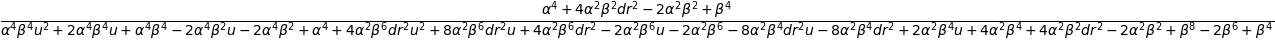

In [35]:
trsq2 = cancel(trsq.subs(dimensionless))
trsq2

In [36]:
h = symbols('h',cls=Function)
h = Piecewise((0,x<0),(sqrt(trsq2.subs({alpha:1,u:0.1})),x>=0))
h = h.subs({beta:x})

def pt(t,dampRatio):
    return [h.subs({x:i,dr:dampRatio}) for i in t]

In [37]:
%matplotlib notebook

Traceback (most recent call last):
  File "C:\Users\admin\AppData\Roaming\Python\Python36\site-packages\matplotlib\cbook\__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "C:\Users\admin\AppData\Roaming\Python\Python36\site-packages\matplotlib\cbook\__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "C:\Users\admin\AppData\Roaming\Python\Python36\site-packages\matplotlib\animation.py", line 1498, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


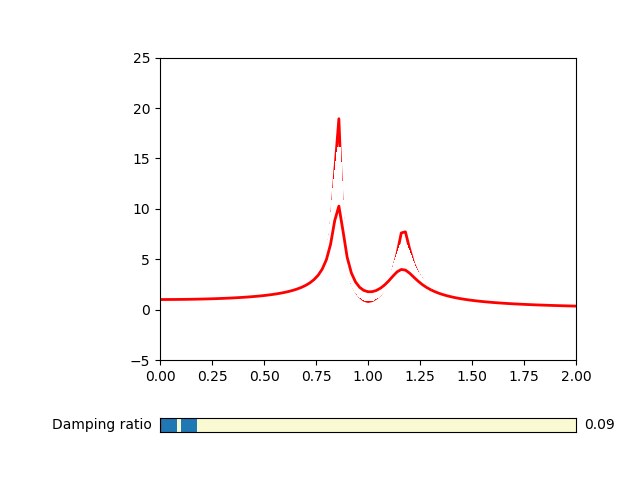

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
from matplotlib.pyplot import rc,rcParams
from IPython.display import HTML

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
xmin = 0
xmax = 2
fine = 50
dr0 = 0.0
t = [i/fine for i in range(xmin*fine,xmax*fine+1)]
s = pt(t,dr0)
l, = plt.plot(t, s, lw=2, color='red')
plt.axis([0, 2, -5, 25])

axcolor = 'lightgoldenrodyellow'
axdr = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
sdr = Slider(axdr, 'Damping ratio', 0.0, 1.0, valinit=dr0)#, valstep=delta_f)

# def update(val):
#     dr = sdr.val    
#     l.set_ydata(pt(t,dr))
#     fig.canvas.draw_idle()
# sdr.on_changed(update)

# resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
# button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')

# def reset(event):    
#     sdr.reset()
# button.on_clicked(reset)

# def expr1(i): 
#     return dis[2,0].subs(t,i)

# def expr2(i): 
#     return dis[1,0].subs(t,i)

# def expr3(i): 
#     return dis[0,0].subs(t,i)

# h = [3,2,1,0]

# fig = pyplot.figure(figsize=(6, 4))
# ax = pyplot.axes(xlim=(-3.5, 3.5), ylim=(-0.5, 3.5))
# pts, = ax.plot([], [])

# # pyplot.figure(figsize=(9,6))
# def init():
#     pts.set_data([expr1(0),expr2(0),expr3(0),0], h)
#     return pts,
# # pyplot.axis([-5, 5, -0.5, 3.5])

fps = 2
# drmin = 0.0
# drmax = 1.0
# drrange = drmax-drmin
no_of_frames = 100

def animate(i):
    i /= no_of_frames  
    l.set_ydata(pt(t,i))
    sdr.set_val(i)
    return l,
    
from matplotlib.animation import FuncAnimation
anim = FuncAnimation(fig, animate, frames=no_of_frames, interval=1000/fps, blit=True)

plt.show()

In [39]:
anim._repr_html_() is None
rc('animation', html='jshtml')
rcParams['animation.embed_limit'] = 120
anim